# Look at WayBack Machine Data

In [8]:
#set up pandas to read the csv file
import pandas as pd

#read the csv file
df = pd.read_csv('historical_price.csv')
print(df.columns)



Index(['Model', 'Creator', 'Context', 'Index', 'Blended', 'Median', 'Median.1',
       'Further', 'Access Date'],
      dtype='object')


In [9]:
# ok I want to find the trends in price of the same modles across time particularly I want to look at Llama 2 Chat (70B) and GPT-4 Turbo
# this means I need to find entries with thes same modle then plot the Blended token price over time using the AccessDate

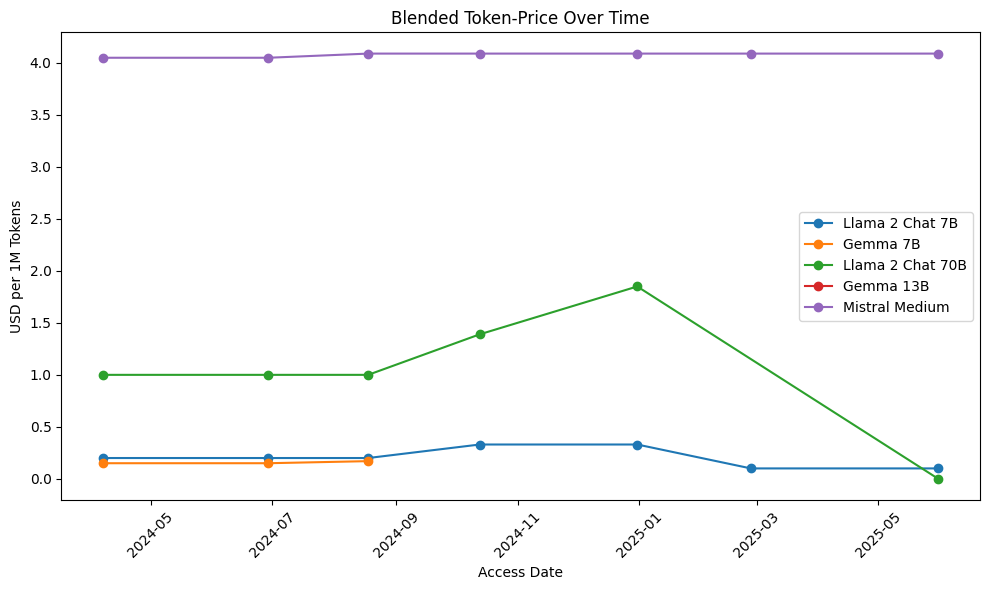

In [12]:
# 1) Parse the Access Date into real datetimes, drop invalid rows
df['Access Date'] = pd.to_datetime(df['Access Date'], format='%m/%d/%Y', errors='coerce')
df = df.dropna(subset=['Access Date'])

# 2) Clean up the Blended column (strip “$” and convert to float)
df['Blended'] = (
    df['Blended']
      .astype(str)
      .str.replace(r'[\$,]', '', regex=True)
      .astype(float)
)

# 3) Filter for the two models, sort by date
models = ['Llama 2 Chat 7B', 'Gemma 7B', 'Llama 2 Chat 70B', 'Gemma 13B', 'Mistral Medium']
df_sub = (df[df['Model'].isin(models)]
            .sort_values('Access Date'))

# 4) Plot with matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for m in models:
    d = df_sub[df_sub['Model']==m]
    plt.plot(d['Access Date'], d['Blended'], marker='o', label=m)

plt.title('Blended Token-Price Over Time')
plt.xlabel('Access Date')
plt.ylabel('USD per 1M Tokens')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()